,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


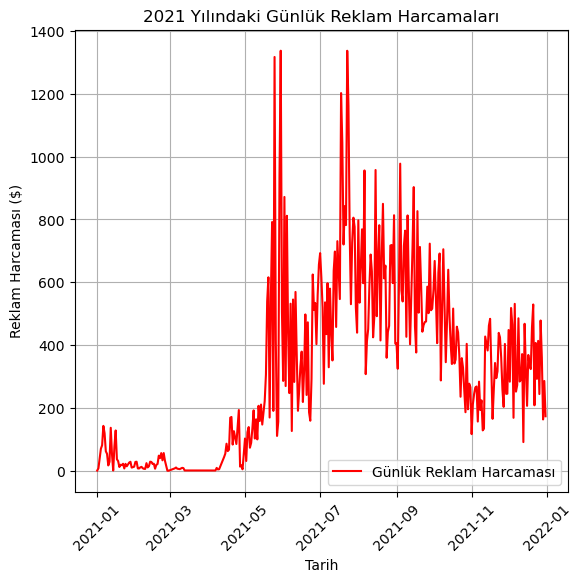

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/LENOVO/Downloads/facebook_ads_data.csv')
display(df)
df['ad_date'] = pd.to_datetime(df['ad_date'])
df_2021 = df[df['ad_date'].dt.year == 2021]
# Günlük toplam reklam harcamasını hesaplama
daily_ad_spending = df_2021.groupby('ad_date')['total_spend'].sum()

# Günlük ROMI'yi hesaplama
daily_romi = df_2021.groupby('ad_date')['romi'].mean()

# Grafik oluşturma
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(daily_ad_spending.index, daily_ad_spending.values, label='Günlük Reklam Harcaması', color='red')
plt.title('2021 Yılındaki Günlük Reklam Harcamaları')
plt.xlabel('Tarih')
plt.ylabel('Reklam Harcaması ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

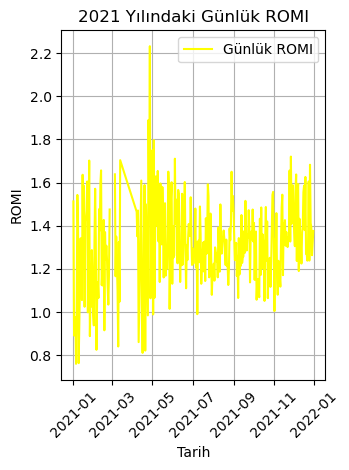

In [2]:

# 2. Grafik: Günlük ROMI
plt.subplot(1, 2, 2)
plt.plot(daily_romi.index, daily_romi.values, label='Günlük ROMI', color='yellow')
plt.title('2021 Yılındaki Günlük ROMI')
plt.xlabel('Tarih')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


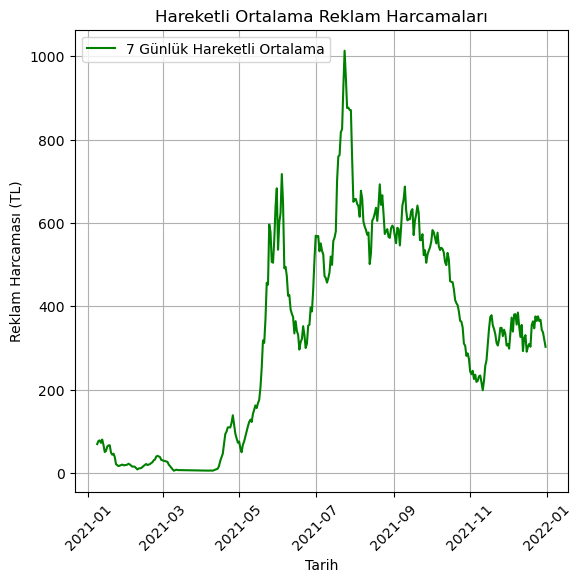

In [6]:

# Bonus: Hareketli ortalama hesaplama
rolling_ad_spending = daily_ad_spending.rolling(window=7).mean()  # 7 günlük hareketli ortalama
rolling_romi = daily_romi.rolling(window=7).mean()  # 7 günlük hareketli ortalama
# Hareketli ortalama grafiği
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(rolling_ad_spending.index, rolling_ad_spending.values, label='7 Günlük Hareketli Ortalama', color='green')
plt.title('Hareketli Ortalama Reklam Harcamaları')
plt.xlabel('Tarih')
plt.ylabel('Reklam Harcaması (TL)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()


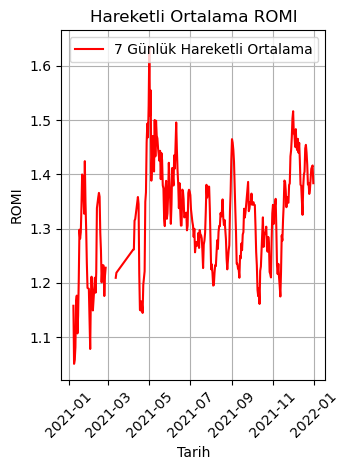

In [4]:
# 2. Grafik: Hareketli Ortalama ROMI
plt.subplot(1, 2, 2)
plt.plot(rolling_romi.index, rolling_romi.values, label='7 Günlük Hareketli Ortalama', color='red')
plt.title('Hareketli Ortalama ROMI')
plt.xlabel('Tarih')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


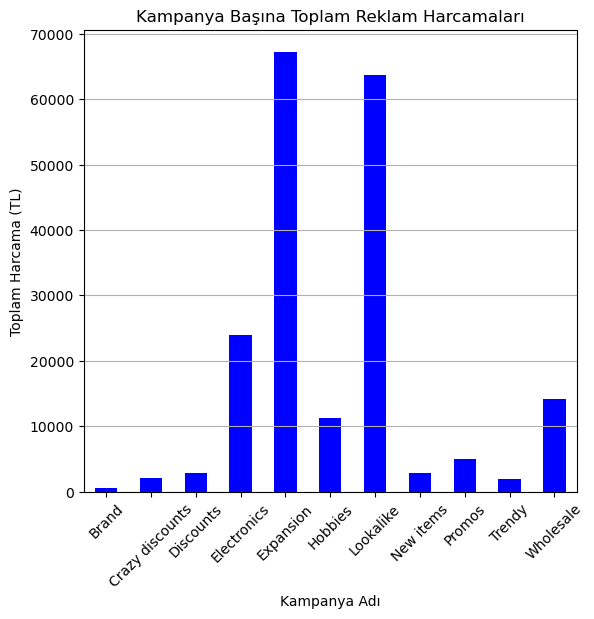

In [5]:

# Kampanya adına göre toplam reklam harcamalarını hesaplama
total_spend_by_campaign = df.groupby('campaign_name')['total_spend'].sum()

# Kampanya adına göre genel ROMI'yi hesaplama
average_romi_by_campaign = df.groupby('campaign_name')['romi'].mean()

# Grafik oluşturma
plt.figure(figsize=(14, 6))

# 1. Grafik: Her bir kampanyadaki toplam reklam harcamaları
plt.subplot(1, 2, 1)
total_spend_by_campaign.plot(kind='bar', color='blue')
plt.title('Kampanya Başına Toplam Reklam Harcamaları')
plt.xlabel('Kampanya Adı')
plt.ylabel('Toplam Harcama (TL)')
plt.xticks(rotation=45)
plt.grid(axis='y')

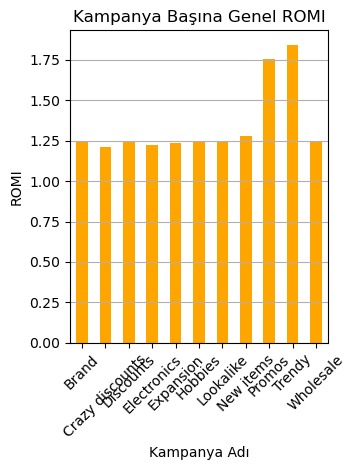

In [7]:

# 2. Grafik: Her bir kampanyadaki genel ROMI
plt.subplot(1, 2, 2)
average_romi_by_campaign.plot(kind='bar', color='orange')
plt.title('Kampanya Başına Genel ROMI')
plt.xlabel('Kampanya Adı')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

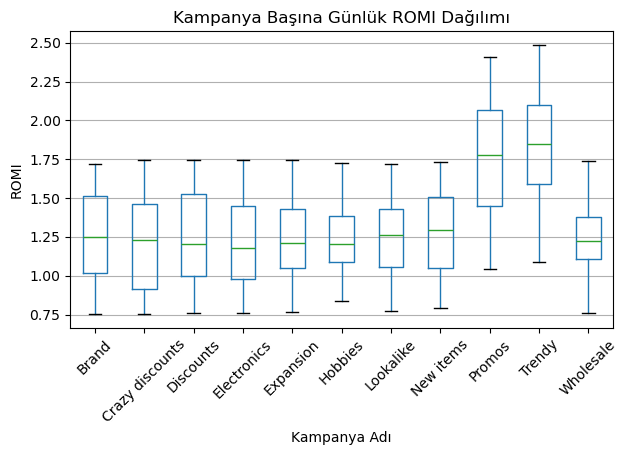

In [8]:


# Box plot için kampanya adına göre ROMI'yi gruplama
plt.figure(figsize=(12, 6))
df.boxplot(column='romi', by='campaign_name', grid=False)

# Grafik başlıkları ve etiketleri
plt.title('Kampanya Başına Günlük ROMI Dağılımı')
plt.suptitle('')  # Üst başlığı kaldır
plt.xlabel('Kampanya Adı')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Grafiği göster
plt.tight_layout()
plt.show()

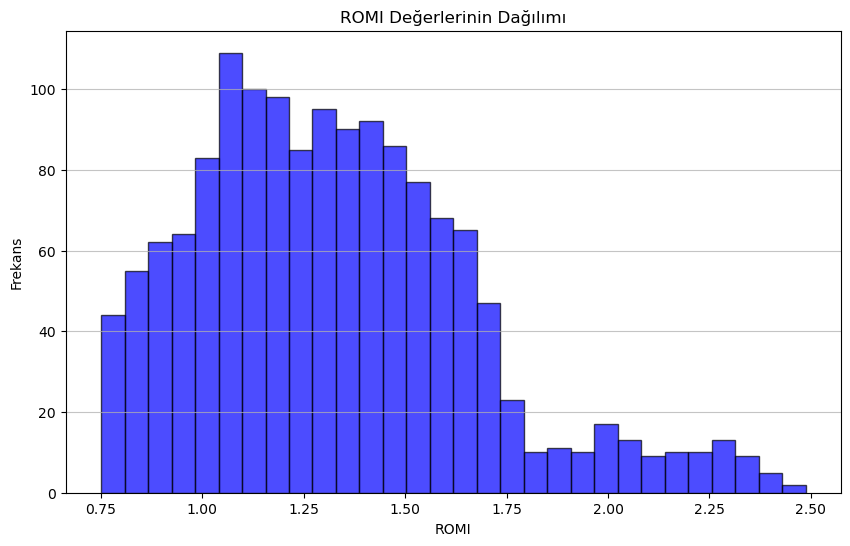

In [9]:

# ROMI sütununu kontrol etme ve NaN değerleri temizleme
df['romi'] = pd.to_numeric(df['romi'], errors='coerce')  # ROMI değerlerini sayıya çevir
df = df.dropna(subset=['romi'])  # NaN değerleri kaldır
# Histogram oluşturma
plt.figure(figsize=(10, 6))
plt.hist(df['romi'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('ROMI Değerlerinin Dağılımı')
plt.xlabel('ROMI')
plt.ylabel('Frekans')
plt.grid(axis='y', alpha=0.75)

# Grafiği göster
plt.show()


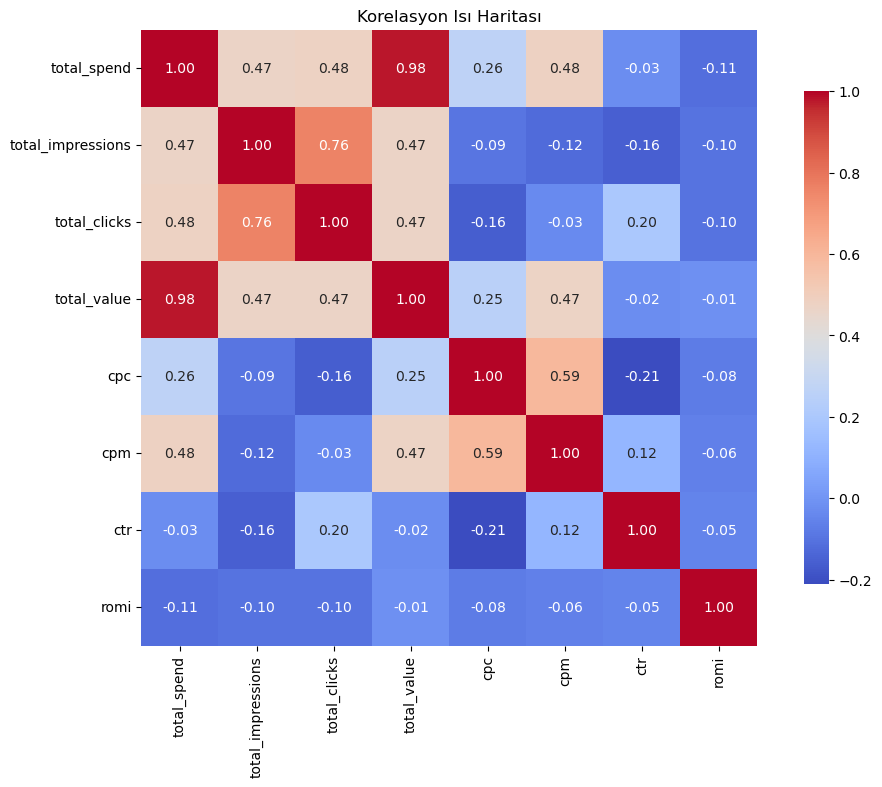

In [10]:
 # Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplama
correlation_matrix = numeric_columns.corr()

# Isı haritasını oluşturma
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Korelasyon Isı Haritası')
plt.show()

In [11]:
# En yüksek ve en düşük korelasyonları bulma
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
lowest_correlation = correlation_matrix.unstack().sort_values(ascending=True)

# En yüksek ve en düşük korelasyonları yazdırma
display("En Yüksek Korelasyonlar:")
display(highest_correlation[highest_correlation < 1].head(10))  # 1'den küçük en yüksek 10 korelasyon

display("\nEn Düşük Korelasyonlar:")
display(lowest_correlation.head(10))  # En düşük 10 korelasyon

# "total_value" ile olan korelasyonları yazdırma
total_value_correlation = correlation_matrix['total_value'].sort_values(ascending=False)
display("\n'total_value' ile Korelasyonlar:")
display(total_value_correlation)

'En Yüksek Korelasyonlar:'

total_value        total_spend          0.978719
total_spend        total_value          0.978719
total_clicks       total_impressions    0.762974
total_impressions  total_clicks         0.762974
cpm                cpc                  0.593732
cpc                cpm                  0.593732
total_spend        cpm                  0.482027
cpm                total_spend          0.482027
total_spend        total_clicks         0.475481
total_clicks       total_spend          0.475481
dtype: float64

'\nEn Düşük Korelasyonlar:'

ctr                cpc                 -0.210719
cpc                ctr                 -0.210719
                   total_clicks        -0.159521
total_clicks       cpc                 -0.159521
ctr                total_impressions   -0.155701
total_impressions  ctr                 -0.155701
                   cpm                 -0.121094
cpm                total_impressions   -0.121094
romi               total_spend         -0.114859
total_spend        romi                -0.114859
dtype: float64

"\n'total_value' ile Korelasyonlar:"

total_value          1.000000
total_spend          0.978719
cpm                  0.471338
total_clicks         0.467528
total_impressions    0.466770
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64

<Figure size 1000x600 with 0 Axes>

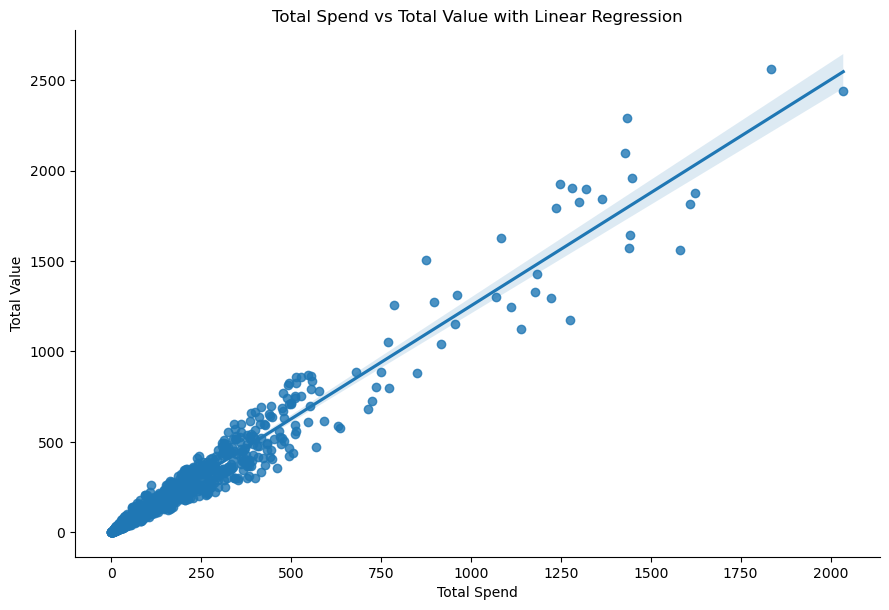

In [12]:

# NaN değerleri temizleme
df = df.dropna(subset=['total_spend', 'total_value'])

# Doğrusal regresyonlu nokta grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.lmplot(x='total_spend', y='total_value', data=df, aspect=1.5, height=6)
# Grafik başlıkları ve etiketleri
plt.title('Total Spend vs Total Value with Linear Regression')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
# Grafiği göster
plt.show()